## 1. Data collection

https://www.kaggle.com/ruhong/champs-scalar-coupling-rf/notebook?select=train.csv

## 2. Data Cleaning

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [11]:
# Train.csv
train = pd.read_csv('datasets/train.csv')

In [12]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [13]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659076 entries, 0 to 4659075
Data columns (total 6 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   id                        4659076 non-null  int64  
 1   molecule_name             4659076 non-null  object 
 2   atom_index_0              4659076 non-null  int64  
 3   atom_index_1              4659076 non-null  int64  
 4   type                      4659076 non-null  object 
 5   scalar_coupling_constant  4659076 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.3+ MB


In [14]:
# no duplicated data
train.duplicated().any()

False

In [15]:
# Structure.csv
structures = pd.read_csv('datasets/structures.csv')

In [16]:
structures.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [17]:
structures.info(verbose=True, null_counts=True)
# No null values in structures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358875 entries, 0 to 2358874
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   molecule_name  2358875 non-null  object 
 1   atom_index     2358875 non-null  int64  
 2   atom           2358875 non-null  object 
 3   x              2358875 non-null  float64
 4   y              2358875 non-null  float64
 5   z              2358875 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 108.0+ MB


In [19]:
structures.duplicated().any()
# no duplicated rows in structures

False

## 3. Exploratory Data Analysis

In [20]:
train.describe()
# scalar_coupling_constant could be negavtive and positive

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.659076e+06,4.659076e+06,4.659076e+06,4.659076e+06
mean,2.329538e+06,1.335677e+01,5.881245e+00,1.591591e+01
std,1.344960e+06,3.269432e+00,4.993794e+00,3.493466e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,-4.476050e+01
25%,1.164769e+06,1.100000e+01,2.000000e+00,-2.551463e-01
50%,2.329538e+06,1.300000e+01,5.000000e+00,2.280350e+00
75%,3.494306e+06,1.600000e+01,8.000000e+00,7.389100e+00
max,4.659075e+06,2.800000e+01,2.800000e+01,2.077090e+02


In [21]:
print('These are {} entries in train.csv'.format(len(train)))
print('There are {} different molecules in train.csv'.format(train.molecule_name.nunique()))
print('There are {} different kinds of coupling types in train.csv'.format(train.type.nunique()))

These are 4659076 entries in train.csv
There are 85012 different molecules in train.csv
There are 8 different kinds of coupling types in train.csv


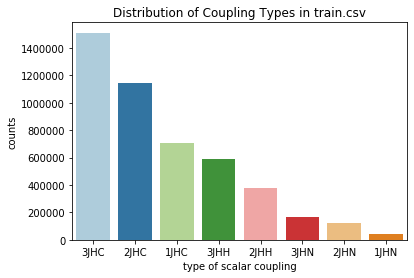

In [22]:
s1 = train.type.value_counts()
sns.barplot(x=s1.index, y=s1, palette='Paired')
plt.xlabel('type of scalar coupling')
plt.ylabel('counts')
plt.title('Distribution of Coupling Types in train.csv')
plt.show()

#### From the barplot above, three-bond coupling 3J between carbon C and hydrogen H is the most common coupling type, and one-bond coupling 1J between hydrogen H and nitrogen N is the most rare in train

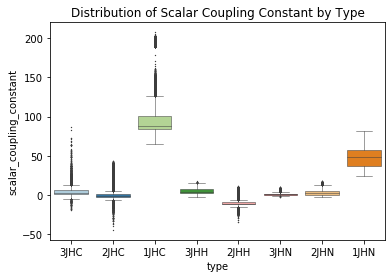

In [24]:
sns.boxplot(x = 'type',
            y = 'scalar_coupling_constant',
           data = train,
           linewidth = 0.5, 
           fliersize = 0.5,
            order = s1.index, 
           palette = 'Paired')
plt.title('Distribution of Scalar Coupling Constant by Type')
plt.show()


#### The boxplot above shows the distribution of scalar coupling constant by type. All one-bond couplings including 1JHC and 1JHN have positive scalar coupling constant as expected, and for most of 3JHC, scalar coupling constants are positive or very close to 0. It appears that one-bond coupling 1JHC has the highest overall magnitude.

In [25]:
print('There are {} entries in structures.csv.'.format(len(structures)))
print('There are {} different molecules in structures.csv.'.format(structures.molecule_name.nunique()))
print('There are {} different kinds of atoms in structure.csv.'.format(structures.atom.nunique()))

There are 2358875 entries in structures.csv.
There are 130789 different molecules in structures.csv.
There are 5 different kinds of atoms in structure.csv.


In [26]:
structures.describe()

,atom_index,x,y,z
count,2.358875e+06,2.358875e+06,2.358875e+06,2.358875e+06
mean,8.757255e+00,9.495981e-02,-3.335625e-01,6.239050e-02
std,5.592444e+00,1.655403e+00,1.989328e+00,1.445876e+00
min,0.000000e+00,-9.234889e+00,-9.933938e+00,-9.134765e+00
25%,4.000000e+00,-8.746228e-01,-1.826097e+00,-8.424758e-01
50%,9.000000e+00,5.183962e-02,-4.034906e-01,1.092888e-02
75%,1.300000e+01,1.116163e+00,1.373848e+00,9.393901e-01
max,2.800000e+01,9.382240e+00,1.018196e+01,7.894733e+00


Structures contains much more molecules than does train, including those not present in train.

In [27]:
structures.atom.value_counts()

H    1208486
C     831809
O     183202
N     132382
F       2996
Name: atom, dtype: int64

There 2996 atom pairs that contain Fluorine F, and this project does not require prediction of scalar_coupling_constant for any pair that contains F.

In [28]:
# generate a feature called count_of_atoms to show the number of atoms in the molecules

structures['count_of_atoms'] = structures.groupby('molecule_name')['atom_index'].transform('count')
structures.head()

,molecule_name,atom_index,atom,x,y,z,count_of_atoms
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001,5
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976,5
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277,5
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644,5
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397,5


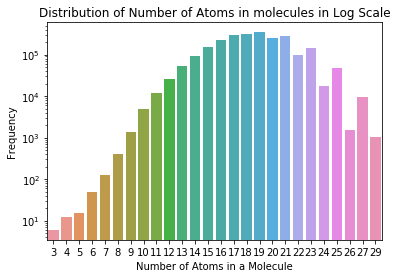

In [30]:
s = structures['count_of_atoms'].value_counts().sort_index()
sns.barplot(s.index, s.values)
plt.xlabel('Number of Atoms in a Molecule')
plt.yscale('log')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Atoms in molecules in Log Scale')
plt.show()

From the barplot above we can see that most of molecules consist of 15-21 atoms, small molecules containing less than 10 atoms are not common in this dataset.

In [31]:
# break down type into 2 other features

train['bond_length'] = train['type'].str[0]
train['atom_1'] = train['type'].str[3]

train.head(10)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,C
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,C
5,5,dsgdb9nsd_000001,2,3,2JHH,-11.2541,2,H
6,6,dsgdb9nsd_000001,2,4,2JHH,-11.2548,2,H
7,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,1,C
8,8,dsgdb9nsd_000001,3,4,2JHH,-11.2543,2,H
9,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,1,C


The column of type of coupling (e.g. 1JHC) was broken down into different columns containing one single piece of attribute (e.g. 1 for bond_length, C for atom_1) for convenience of analysis (atom_0 was omitted as all train['type'].str[2] is H.

In [33]:
df = train.merge(structures, 
                how = 'left', 
                left_on = ['molecule_name', 'atom_index_0'],
                right_on = ['molecule_name', 'atom_index']).merge(structures,
                how = 'left',
                left_on = ['molecule_name', 'atom_index_1', 'atom_1', 'count_of_atoms'],
                right_on = ['molecule_name', 'atom_index', 'atom', 'count_of_atoms'],
                                                                 suffixes = ['_0', '_1'])
df.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_index_0,atom_0,x_0,y_0,z_0,count_of_atoms,atom_index_1,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,C,1,H,0.002150,-0.006031,0.001976,5,0,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,1,H,0.002150,-0.006031,0.001976,5,2,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,1,H,0.002150,-0.006031,0.001976,5,3,H,-0.540815,1.447527,-0.876644
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,1,H,0.002150,-0.006031,0.001976,5,4,H,-0.523814,1.437933,0.906397
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,C,2,H,1.011731,1.463751,0.000277,5,0,C,-0.012698,1.085804,0.008001


In [41]:
final = df.loc[:, ~df.columns.duplicated()].set_index('id')
final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,z_0,count_of_atoms,x_1,y_1,z_1
id,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,C,H,0.002150,-0.006031,0.001976,5,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,5,1.011731,1.463751,0.000277
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,5,-0.540815,1.447527,-0.876644
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,5,-0.523814,1.437933,0.906397
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,C,H,1.011731,1.463751,0.000277,5,-0.012698,1.085804,0.008001


Duplicated columns need to be removed.

In [42]:
# https://www.kaggle.com/seriousran/just-speed-up-calculate-distance-from-benchmark

p0 = final[['x_0', 'y_0', 'z_0']].values
p1 = final[['x_1', 'y_1', 'z_1']].values
final['distance'] = np.linalg.norm(p0 - p1, axis = 1)
final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,z_0,count_of_atoms,x_1,y_1,z_1,distance
id,,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,C,H,0.002150,-0.006031,0.001976,5,-0.012698,1.085804,0.008001,1.091953
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,0.001976,5,1.011731,1.463751,0.000277,1.783120
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,0.001976,5,-0.540815,1.447527,-0.876644,1.783147
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,0.001976,5,-0.523814,1.437933,0.906397,1.783157
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,C,H,1.011731,1.463751,0.000277,5,-0.012698,1.085804,0.008001,1.091952


Efficiently calculated distance between 2 atoms with cartesian coordinate values.

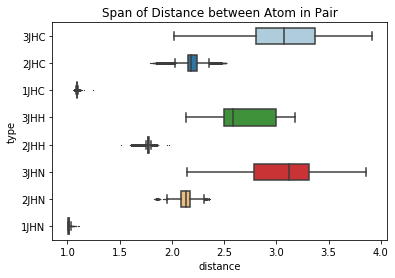

In [44]:
sns.boxplot(x = 'distance',
           y = 'type',
           data = final,
           width = 0.6,
           fliersize = 0.4,
           palette = 'Paired',
           order = s1.index)
plt.title('Span of Distance between Atom in Pair')
plt.show()

From the boxplot above, we can see that in general the atom pairs of 3J are more far apart than those of 1J.

In [46]:
final['distance_zscore_by_type'] = final.groupby('type')['distance'].transform(zscore)
final['distance_mean_by_type'] = final.groupby('type')['distance'].transform('mean')
final['distance_mean_by_bond_length'] = final.groupby('bond_length')['distance'].transform('mean')
final['distance_zscore_by_bond_length'] = final.groupby('bond_length')['distance'].transform(zscore)
final['distance_mean_by_atom_1'] = final.groupby('atom_1')['distance'].transform('mean')
final['distance_zscore_by_atom_1'] = final.groupby('atom_1')['distance'].transform(zscore)
final['distance_x'] = (final.x_0 - final.x_1).abs()
final['distance_y'] = (final.y_0 - final.y_1).abs()
final['distance_z'] = (final.z_0 - final.z_1).abs()

final.head()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,bond_length,atom_1,atom_0,x_0,y_0,...,distance,distance_zscore_by_type,distance_mean_by_type,distance_mean_by_bond_length,distance_zscore_by_bond_length,distance_mean_by_atom_1,distance_zscore_by_atom_1,distance_x,distance_y,distance_z
id,,,,,,,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,C,H,0.002150,-0.006031,...,1.091953,-0.138877,1.092900,1.088254,0.185838,2.358492,-1.598941,0.014849,1.091835,0.006025
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2,H,H,0.002150,-0.006031,...,1.783120,0.353453,1.774872,2.090498,-1.628423,2.340031,-1.119658,1.009580,1.469782,0.001700
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2,H,H,0.002150,-0.006031,...,1.783147,0.354641,1.774872,2.090498,-1.628276,2.340031,-1.119603,0.542965,1.453558,0.878620
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2,H,H,0.002150,-0.006031,...,1.783157,0.355035,1.774872,2.090498,-1.628227,2.340031,-1.119584,0.525964,1.443964,0.904421
4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1,C,H,1.011731,1.463751,...,1.091952,-0.139088,1.092900,1.088254,0.185766,2.358492,-1.598943,1.024429,0.377947,0.007724


In [2]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem import rdDepictor, Draw
from glob import glob
from xyz2mol import xyz2mol, read_xyz_file
from rdkit.Chem.rdMolTransforms import GetAngleDeg, GetDihedralDeg

ModuleNotFoundError: No module named 'xyz2mol'

In [7]:
%%bash -e
if ! [[ -f ./xyz2mol.py ]]; then
  wget https://raw.githubusercontent.com/jensengroup/xyz2mol/master/xyz2mol.py
fi

Couldn't find program: 'bash'
